# HarperValley

In [ ]:
!pip install pydub

In [ ]:
from pydub import AudioSegment
import json
import os

In [ ]:
# Define paths
transcript_file = '/content/Database/data/transcript/004860b1ab2e4c88.json'
agent_audio_file = '/content/Database/data/audio/agent/004860b1ab2e4c88.wav'
caller_audio_file = '/content/Database/data/audio/caller/004860b1ab2e4c88.wav'
output_dir = '/content/drive/MyDrive/Dataset/004860b1ab2e4c88'
# Create output directory if it doesn't exist
os.makedirs(output_dir, exist_ok=True)

# Load transcript JSON
with open(transcript_file, 'r') as f:
    transcript_data = json.load(f)

# Load audio files
agent_audio = AudioSegment.from_wav(agent_audio_file)
caller_audio = AudioSegment.from_wav(caller_audio_file)

# Extract and save segments
for segment in transcript_data:
    if segment['channel_index'] == 1:
        audio = caller_audio
    else:
        audio = agent_audio

    start_time = segment['start_ms']  # Start time in milliseconds
    duration = segment['duration_ms']  # Duration in milliseconds
    end_time = start_time + duration  # Calculate end time

    # Extract segment
    audio_segment = audio[start_time:end_time]

    # Generate filename based on the index
    filename = f"segment_{segment['index']}.wav"
    output_path = os.path.join(output_dir, filename)

    # Save the extracted audio segment
    audio_segment.export(output_path, format='wav')
    print(f'Saved: {output_path}')

print('Audio segments extracted and saved.')

Saved: /content/segment_1.wav
Saved: /content/segment_2.wav
Saved: /content/segment_3.wav
Saved: /content/segment_4.wav
Saved: /content/segment_5.wav
Saved: /content/segment_6.wav
Saved: /content/segment_7.wav
Saved: /content/segment_8.wav
Saved: /content/segment_9.wav
Saved: /content/segment_10.wav
Saved: /content/segment_11.wav
Saved: /content/segment_12.wav
Saved: /content/segment_13.wav
Saved: /content/segment_14.wav
Saved: /content/segment_15.wav
Saved: /content/segment_16.wav
Saved: /content/segment_17.wav
Saved: /content/segment_18.wav
Audio segments extracted and saved.


## Explore Metadata Files

To see if 'survey_response' field in metadata files is worth exploring:

In [ ]:
import os
import json
import matplotlib.pyplot as plt
from collections import Counter

# Path to metadata folder
metadata_folder = '/content/Database/data/metadata'

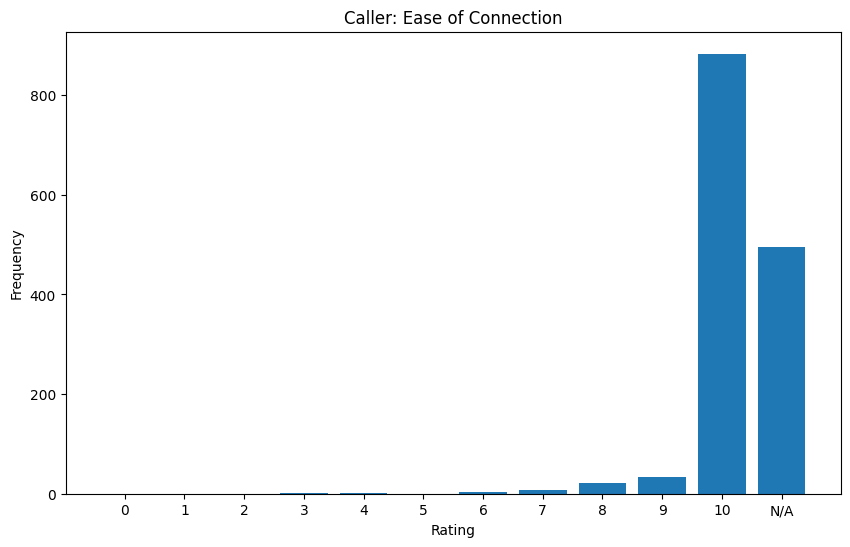

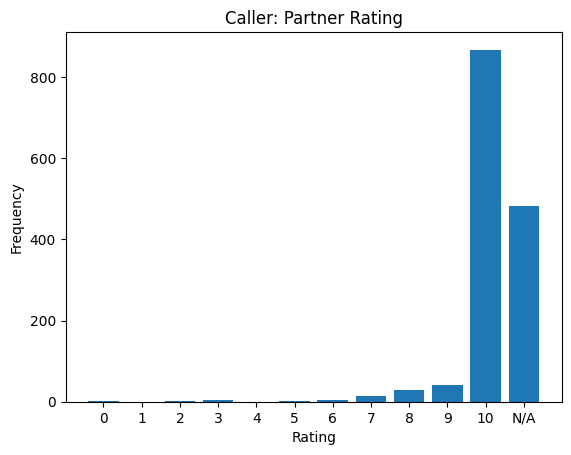

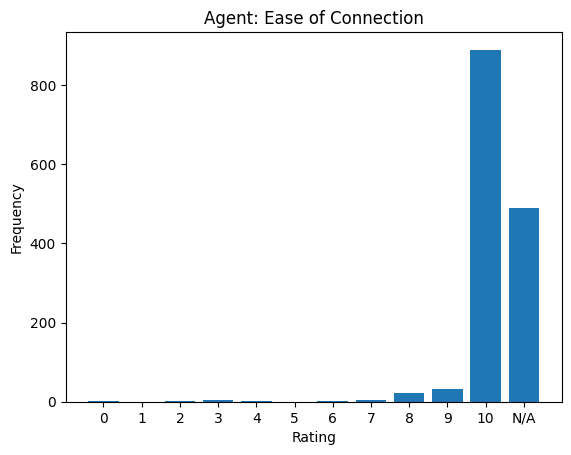

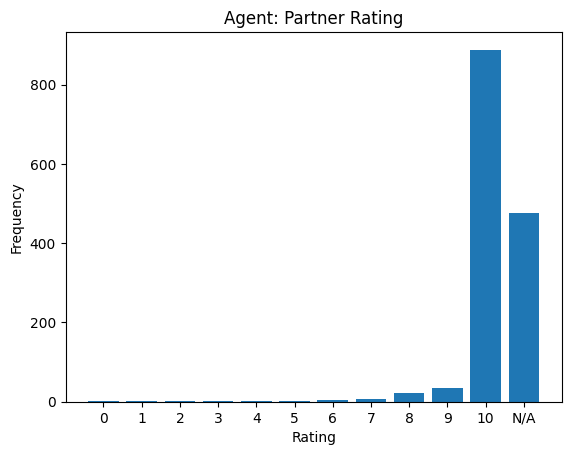

In [ ]:
# Initialize counters for survey responses
survey_counters = {
    'caller_ease_of_connection': Counter(),
    'caller_partner_rating': Counter(),
    'agent_ease_of_connection': Counter(),
    'agent_partner_rating': Counter()
}

def process_survey(survey, ease_counter, partner_counter):
    '''Process a single survey response.'''
    if survey and survey.get('data'):
        ease_counter[survey['data'].get('ease_of_connection', 'N/A')] += 1
        partner_counter[survey['data'].get('partner_rating', 'N/A')] += 1
    else:
        # If survey_response is null or data is missing, count as 'N/A'
        ease_counter['N/A'] += 1
        partner_counter['N/A'] += 1

# Process all metadata files
for filename in os.listdir(metadata_folder):
    if filename.endswith('.json'):
        file_path = os.path.join(metadata_folder, filename)
        with open(file_path, 'r') as f:
            data = json.load(f)

        # Process caller and agent survey responses
        process_survey(data.get('caller', {}).get('survey_response'),
                       survey_counters['caller_ease_of_connection'],
                       survey_counters['caller_partner_rating'])
        process_survey(data.get('agent', {}).get('survey_response'),
                       survey_counters['agent_ease_of_connection'],
                       survey_counters['agent_partner_rating'])

def plot_bar(data, title, xlabel, ylabel):
    '''Plot a bar chart for survey responses.'''
    keys = list(range(11)) + ['N/A']
    x = [str(k) for k in keys]
    y = [data.get(str(k), 0) for k in keys]

    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot the bar charts
plt.figure(figsize=(10, 6))
plot_bar(survey_counters['caller_ease_of_connection'],
         'Caller: Ease of Connection', 'Rating', 'Frequency')
plot_bar(survey_counters['caller_partner_rating'],
         'Caller: Partner Rating', 'Rating', 'Frequency')
plot_bar(survey_counters['agent_ease_of_connection'],
         'Agent: Ease of Connection', 'Rating', 'Frequency')
plot_bar(survey_counters['agent_partner_rating'],
         'Agent: Partner Rating', 'Rating', 'Frequency')

Survey response is generally full points or nothing. Not worth exploring.

To see if the field 'labels' in metadata files is worth exploring:

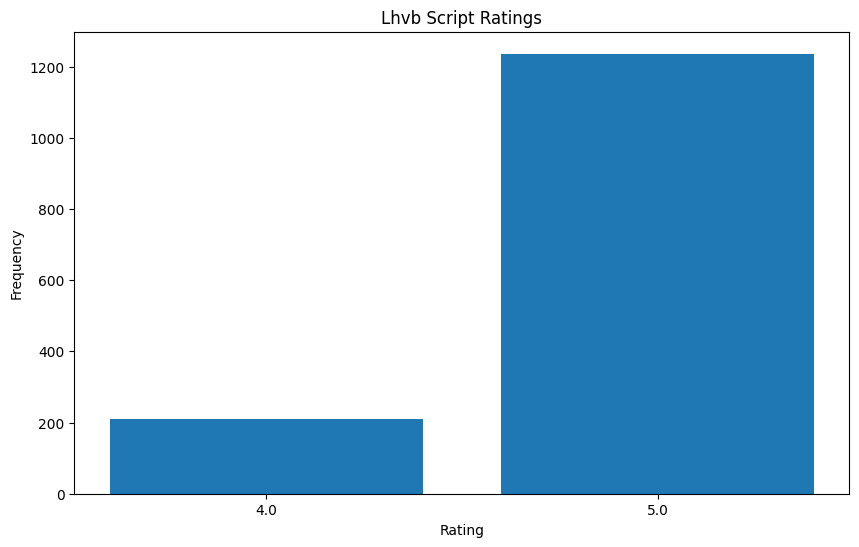

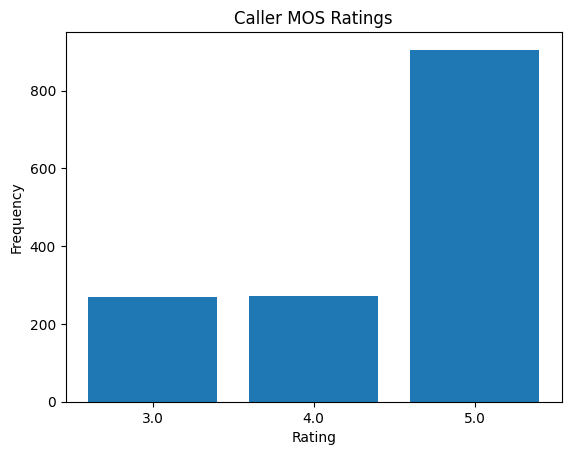

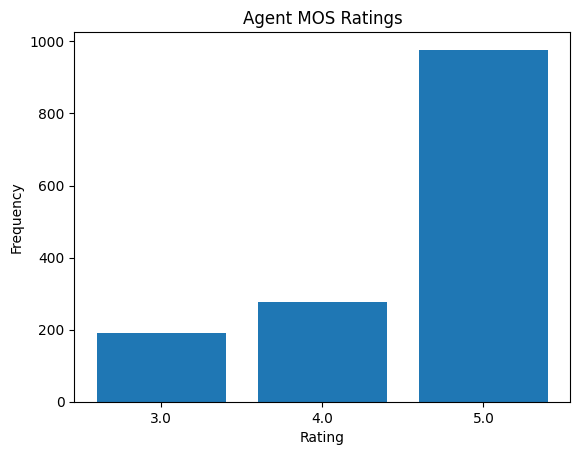

In [ ]:
# Initialize counters for labels
label_counters = {
    'lhvb_script': Counter(),
    'caller_mos': Counter(),
    'agent_mos': Counter()
}

def process_labels(labels, counters):
    '''Process the labels section of the metadata file.'''
    for key in counters.keys():
        value = labels.get(key, 'N/A')
        counters[key][value] += 1

# Process all metadata files
for filename in os.listdir(metadata_folder):
    if filename.endswith('.json'):
        file_path = os.path.join(metadata_folder, filename)
        with open(file_path, 'r') as f:
            data = json.load(f)

        # Process the labels section
        labels = data.get('labels', {})
        process_labels(labels, label_counters)

def plot_label_distribution(data, title, xlabel, ylabel):
    '''Plot a bar chart for label distributions.'''
    keys = sorted(data.keys(), key=lambda x: (str(x) != 'N/A', x))  # Sort with 'N/A' last
    x = [str(k) for k in keys]
    y = [data[k] for k in keys]

    plt.bar(x, y)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()

# Plot the bar charts
plt.figure(figsize=(10, 6))
plot_label_distribution(label_counters['lhvb_script'],
                        'Lhvb Script Ratings', 'Rating', 'Frequency')
plot_label_distribution(label_counters['caller_mos'],
                        'Caller MOS Ratings', 'Rating', 'Frequency')
plot_label_distribution(label_counters['agent_mos'],
                        'Agent MOS Ratings', 'Rating', 'Frequency')

All three fields have strong bias. Not worth exploring.

In [ ]:
# Access database
!git clone https://github.com/cricketclub/gridspace-stanford-harper-valley.git Database

Cloning into 'Database'...
remote: Enumerating objects: 8983, done.
remote: Counting objects: 100% (3188/3188), done.
remote: Compressing objects: 100% (1599/1599), done.
remote: Total 8983 (delta 3035), reused 1705 (delta 1586), pack-reused 5795 (from 1)
Receiving objects: 100% (8983/8983), 657.20 MiB | 15.31 MiB/s, done.
Resolving deltas: 100% (7025/7025), done.
Updating files: 100% (5886/5886), done.


# MOSEI

In [ ]:
# clone data loader
!git clone https://github.com/CMU-MultiComp-Lab/CMU-MultimodalSDK.git

Cloning into 'CMU-MultimodalSDK'...
remote: Enumerating objects: 100, done.
remote: Counting objects: 100% (100/100), done.
remote: Compressing objects: 100% (82/82), done.
remote: Total 100 (delta 13), reused 94 (delta 11), pack-reused 0 (from 0)
Receiving objects: 100% (100/100), 294.05 KiB | 1.21 MiB/s, done.
Resolving deltas: 100% (13/13), done.


In [ ]:
# install requirements
%cd /content/CMU-MultimodalSDK
!pip install .

/content/CMU-MultimodalSDK
Processing /content/CMU-MultimodalSDK
  Preparing metadata (setup.py) ... done
  Created wheel for mmsdk: filename=mmsdk-1.1.0-py3-none-any.whl size=79210 sha256=0a4e736f9e82b16cb2972471ca6350eb44340fe00452d6e4b5985812328f34ff
  Stored in directory: /root/.cache/pip/wheels/c6/12/b6/5abbb16746cd7a88030aee0301975f51dea74e77699c67ed0b
Successfully built mmsdk
  Attempting uninstall: mmsdk
    Found existing installation: mmsdk 1.1.0
    Uninstalling mmsdk-1.1.0:
      Successfully uninstalled mmsdk-1.1.0


In [ ]:
from mmsdk import mmdatasdk

In [ ]:
# fetch dataset high level features
cmumosei_highlevel=mmdatasdk.mmdataset(mmdatasdk.cmu_mosei.highlevel,'cmumosei/')

[2024-11-21 08:35:55.615] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSEI/language/CMU_MOSEI_TimestampedWordVectors.csd to cmumosei/CMU_MOSEI_TimestampedWordVectors.csd...


[2024-11-21 08:36:50.936] | Success | Download complete!
[2024-11-21 08:36:51.032] | Success | Computational sequence read from file cmumosei/CMU_MOSEI_TimestampedWordVectors.csd ...
[2024-11-21 08:36:51.363] | Status  | Checking the integrity of the <glove_vectors> computational sequence ...
[2024-11-21 08:36:51.364] | Status  | Checking the format of the data in <glove_vectors> computational sequence ...


[2024-11-21 08:36:53.612] | Success | <glove_vectors> computational sequence data in correct format.
[2024-11-21 08:36:53.612] | Status  | Checking the format of the metadata in <glove_vectors> computational sequence ...
[2024-11-21 08:36:53.612] | Warning | <glove_vectors> computational sequence does not have all the required metadata ... continuing 
[2024-11-21 08:36:53.981] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSEI/acoustic/CMU_MOSEI_COVAREP.csd to cmumosei/CMU_MOSEI_COVAREP.csd...


[2024-11-21 08:44:33.479] | Success | Download complete!
[2024-11-21 08:44:33.488] | Success | Computational sequence read from file cmumosei/CMU_MOSEI_COVAREP.csd ...
[2024-11-21 08:44:34.912] | Status  | Checking the integrity of the <COVAREP> computational sequence ...
[2024-11-21 08:44:34.912] | Status  | Checking the format of the data in <COVAREP> computational sequence ...


[2024-11-21 08:44:39.694] | Success | <COVAREP> computational sequence data in correct format.
[2024-11-21 08:44:39.694] | Status  | Checking the format of the metadata in <COVAREP> computational sequence ...
[2024-11-21 08:44:39.694] | Warning | <COVAREP> computational sequence does not have all the required metadata ... continuing 
[2024-11-21 08:44:39.996] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSEI/visual/CMU_MOSEI_VisualOpenFace2.csd to cmumosei/CMU_MOSEI_VisualOpenFace2.csd...


[2024-11-21 08:55:31.922] | Success | Download complete!
[2024-11-21 08:55:31.927] | Success | Computational sequence read from file cmumosei/CMU_MOSEI_VisualOpenFace2.csd ...
[2024-11-21 08:55:33.782] | Status  | Checking the integrity of the <OpenFace_2> computational sequence ...
[2024-11-21 08:55:33.783] | Status  | Checking the format of the data in <OpenFace_2> computational sequence ...


[2024-11-21 08:55:39.617] | Success | <OpenFace_2> computational sequence data in correct format.
[2024-11-21 08:55:39.617] | Status  | Checking the format of the metadata in <OpenFace_2> computational sequence ...
[2024-11-21 08:55:39.618] | Warning | <OpenFace_2> computational sequence does not have all the required metadata ... continuing 
[2024-11-21 08:55:39.869] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSEI/visual/CMU_MOSEI_VisualFacet42.csd to cmumosei/CMU_MOSEI_VisualFacet42.csd...


[2024-11-21 08:57:01.747] | Success | Download complete!
[2024-11-21 08:57:01.751] | Success | Computational sequence read from file cmumosei/CMU_MOSEI_VisualFacet42.csd ...
[2024-11-21 08:57:01.910] | Status  | Checking the integrity of the <FACET 4.2> computational sequence ...
[2024-11-21 08:57:01.915] | Status  | Checking the format of the data in <FACET 4.2> computational sequence ...


[2024-11-21 08:57:04.939] | Success | <FACET 4.2> computational sequence data in correct format.
[2024-11-21 08:57:04.939] | Status  | Checking the format of the metadata in <FACET 4.2> computational sequence ...
[2024-11-21 08:57:04.939] | Warning | <FACET 4.2> computational sequence does not have all the required metadata ... continuing 
[2024-11-21 08:57:04.939] | Success | Dataset initialized successfully ... 


In [ ]:
# fetch dataset labels
cmumosei_highlevel.add_computational_sequences(mmdatasdk.cmu_mosei.labels,'cmumosei/')

[2024-11-21 09:12:32.501] | Status  | Downloading from http://immortal.multicomp.cs.cmu.edu/CMU-MOSEI/labels/CMU_MOSEI_Labels.csd to cmumosei/CMU_MOSEI_Labels.csd...


[2024-11-21 09:12:33.827] | Success | Download complete!
[2024-11-21 09:12:33.832] | Success | Computational sequence read from file cmumosei/CMU_MOSEI_Labels.csd ...
[2024-11-21 09:12:33.930] | Status  | Checking the integrity of the <All Labels> computational sequence ...
[2024-11-21 09:12:33.931] | Status  | Checking the format of the data in <All Labels> computational sequence ...


[2024-11-21 09:12:35.610] | Success | <All Labels> computational sequence data in correct format.
[2024-11-21 09:12:35.610] | Status  | Checking the format of the metadata in <All Labels> computational sequence ...
[2024-11-21 09:12:35.610] | Warning | <All Labels> computational sequence does not have all the required metadata ... continuing 


# MOSEI 2

In [1]:
!git clone https://github.com/pliang279/MultiBench.git
%cd MultiBench

Cloning into 'MultiBench'...
remote: Enumerating objects: 6943, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 6943 (delta 72), reused 121 (delta 60), pack-reused 6789 (from 1)
Receiving objects: 100% (6943/6943), 51.07 MiB | 30.21 MiB/s, done.
Resolving deltas: 100% (4258/4258), done.
/content/MultiBench


In [2]:
# access my drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
!pip uninstall torch torchvision torchaudio -y
!pip install torch==2.3.0+cu118 torchvision==0.18.0+cu118 torchaudio==2.3.0+cu118 torchtext==0.18.0 -f https://download.pytorch.org/whl/torch_stable.html

Found existing installation: torch 2.5.1+cu121
Uninstalling torch-2.5.1+cu121:
  Successfully uninstalled torch-2.5.1+cu121
Found existing installation: torchvision 0.20.1+cu121
Uninstalling torchvision-0.20.1+cu121:
  Successfully uninstalled torchvision-0.20.1+cu121
Found existing installation: torchaudio 2.5.1+cu121
Uninstalling torchaudio-2.5.1+cu121:
  Successfully uninstalled torchaudio-2.5.1+cu121
Looking in links: https://download.pytorch.org/whl/torch_stable.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 839.6/839.6 MB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 21.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 91.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 19.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 417.9/417.9 MB 2.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 109.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 

In [4]:
import torch
import sys
import os
# Import the associated dataloader for affect datasets, which MOSEI is a part of
from datasets.affect.get_data import get_dataloader

In [59]:
# Create the training, validation, and test-set dataloaders.
traindata, validdata, testdata = get_dataloader('/content/drive/MyDrive/data/mosei_raw.pkl', data_type='mosei', max_pad=True)

In [68]:
traindata.dataset[0]

[tensor([[ 0.0000, 86.5667,  0.9800,  ...,  0.0000,  0.0000,  0.3846],
         [ 0.0000, 86.8667,  0.9800,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000, 87.2500,  0.9800,  ...,  0.0000,  0.0000,  0.1111],
         ...,
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
         [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]]),
 tensor([[ 1.1593e+02,  7.0000e-01,  7.6338e-02,  ..., -3.4502e-01,
          -3.3369e-01, -2.5789e-01],
         [ 1.0325e+02,  9.0909e-01,  1.2092e-01,  ..., -3.6509e-01,
          -4.0033e-01, -2.8453e-01],
         [ 1.3098e+02,  6.2069e-01,  1.1778e-01,  ..., -3.8097e-01,
          -3.5543e-01, -2.8628e-01],
         ...,
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  ...,  0.0000e+00,
           0.0000e+00,  0.0000e+00],
         [ 0.0000e+

In [69]:
# shape of elements in a line
for i in range(3):
    data = traindata.dataset[i]
    print(data[0].size())
    print(data[1].size())
    print(data[2].size())
    print(data[3].size())
    print()

torch.Size([50, 713])
torch.Size([50, 74])
torch.Size([50, 300])
torch.Size([1, 7])

torch.Size([50, 713])
torch.Size([50, 74])
torch.Size([50, 300])
torch.Size([1, 7])

torch.Size([50, 713])
torch.Size([50, 74])
torch.Size([50, 300])
torch.Size([1, 7])



So we know that index 0 is video, index 1 is audio, index 2 is text, index 3 is label

In [70]:
# shape of elements in a batch
for video, audio, text, label in traindata:
    print('Video Tensor Shape:', video.shape)
    print('Audio Tensor Shape:', audio.shape)
    print('Text Tensor Shape:', text.shape)
    print('Label Shape:', label.shape)
    break  # Stop after the first batch for inspection

Video Tensor Shape: torch.Size([32, 50, 713])
Audio Tensor Shape: torch.Size([32, 50, 74])
Text Tensor Shape: torch.Size([32, 50, 300])
Label Shape: torch.Size([32, 1])


The label shape is wrong, it should be [32, 1, 7]. Need to correct it, also I would like to drop the singleton dimension and result with [32, 7]

In [71]:
from torch.utils.data import DataLoader

In [72]:
def custom_collate(batch):
    videos, audios, texts, labels = zip(*batch)  # Unpack the batch

    # Stack inputs as usual
    videos = torch.stack(videos)
    audios = torch.stack(audios)
    texts = torch.stack(texts)

    # Stack labels and remove the singleton dimension
    labels = torch.cat(labels, dim=0)  # Shape: [batch_size, 7]

    return videos, audios, texts, labels

# Create DataLoader with custom collate function
traindata = DataLoader(traindata.dataset, batch_size=32, collate_fn=custom_collate)

In [73]:
for video, audio, text, label in traindata:
    print('Label Shape:', label.shape)
    break

Label Shape: torch.Size([32, 7])


## Perform z-score standardization

In [74]:
# Initialize accumulators for mean and standard deviation
video_sum, video_sq_sum, video_count = 0, 0, 0
audio_sum, audio_sq_sum, audio_count = 0, 0, 0
text_sum, text_sq_sum, text_count = 0, 0, 0

# Helper function to calculate valid rows (eliminate padded all-zero rows)
def get_valid_rows(batch):
    '''
    Loops backward through each sequence in the batch to find where the padding ends.
    '''
    valid_rows = []
    for seq in batch:
        # Loop backward to find the first non-zero row
        for i in range(seq.size(0) - 1, -1, -1):
            if seq[i].sum() != 0:  # If a row is non-zero, it's valid
                valid_rows.append(seq[:i + 1])  # Include all rows up to this one
                break
    return valid_rows

for video, audio, text, _ in traindata:  # Returns batches for each modality
    # Process video modality
    valid_video_rows = get_valid_rows(video)
    for rows in valid_video_rows:
        video_sum += rows.sum(dim=0)  # Sum valid rows
        video_sq_sum += (rows ** 2).sum(dim=0)  # Sum squared valid rows
        video_count += rows.size(0)  # Count valid rows

    # Process audio modality
    valid_audio_rows = get_valid_rows(audio)
    for rows in valid_audio_rows:
        audio_sum += rows.sum(dim=0)
        audio_sq_sum += (rows ** 2).sum(dim=0)
        audio_count += rows.size(0)

    # Process text modality
    valid_text_rows = get_valid_rows(text)
    for rows in valid_text_rows:
        text_sum += rows.sum(dim=0)
        text_sq_sum += (rows ** 2).sum(dim=0)
        text_count += rows.size(0)

# Calculate mean and std for each modality
video_mean = video_sum / video_count
video_std = torch.sqrt(video_sq_sum / video_count - video_mean ** 2)

audio_mean = audio_sum / audio_count
audio_std = torch.sqrt(audio_sq_sum / audio_count - audio_mean ** 2)

text_mean = text_sum / text_count
text_std = torch.sqrt(text_sq_sum / text_count - text_mean ** 2)

# If any feature in a modality has zero variance, set its standard deviation to 1.0 to avoid division by zero
video_std[video_std == 0] = 1.0
audio_std[audio_std == 0] = 1.0
text_std[text_std == 0] = 1.0

# Print computed values
print('Video mean:', video_mean, '\n')
print('Video std:', video_std, '\n')
print('Audio mean:', audio_mean, '\n')
print('Audio std:', audio_std, '\n')
print('Text mean:', text_mean, '\n')
print('Text std:', text_std)

Video mean: tensor([ 0.0000e+00,  5.7517e+01,  9.3876e-01,  9.6661e-01,  5.4636e-02,
         1.8333e-01, -9.0856e-01, -8.3082e-02,  1.8719e-01, -9.0563e-01,
        -1.5194e-02,  1.9564e-01,  4.0773e+02,  4.0960e+02,  4.1435e+02,
         4.1919e+02,  4.2129e+02,  4.1978e+02,  4.1467e+02,  4.0983e+02,
         4.0172e+02,  4.0454e+02,  4.0860e+02,  4.1370e+02,  4.1895e+02,
         4.2304e+02,  4.2597e+02,  4.2277e+02,  4.1827e+02,  4.1336e+02,
         4.0872e+02,  4.0469e+02,  4.1249e+02,  4.1465e+02,  4.1677e+02,
         4.1760e+02,  4.1666e+02,  4.1450e+02,  4.1238e+02,  4.1155e+02,
         4.7193e+02,  4.7381e+02,  4.7863e+02,  4.8357e+02,  4.8573e+02,
         4.8385e+02,  4.7903e+02,  4.7371e+02,  4.6723e+02,  4.7033e+02,
         4.7458e+02,  4.7991e+02,  4.8494e+02,  4.8883e+02,  4.9152e+02,
         4.8888e+02,  4.8510e+02,  4.8057e+02,  4.7553e+02,  4.7074e+02,
         4.7656e+02,  4.7877e+02,  4.8093e+02,  4.8177e+02,  4.8080e+02,
         4.7859e+02,  4.7644e+02,  4.75

In [90]:
# Standardization function
def z_score_standardize(data_loader, video_mean, video_std, audio_mean, audio_std, text_mean, text_std):
    standardized_data = []
    for video, audio, text, label in data_loader:
        # Standardize each modality
        video = (video - video_mean) / video_std
        audio = (audio - audio_mean) / audio_std
        text = (text - text_mean) / text_std

        # Append standardized data
        standardized_data.append([video, audio, text, label])
    return standardized_data

# Standardize each dataset
s_traindata = z_score_standardize(traindata, video_mean, video_std, audio_mean, audio_std, text_mean, text_std)
s_validdata = z_score_standardize(validdata, video_mean, video_std, audio_mean, audio_std, text_mean, text_std)
s_testdata = z_score_standardize(testdata, video_mean, video_std, audio_mean, audio_std, text_mean, text_std)

In [92]:
import pickle

In [97]:
save_dir = '/content/drive/MyDrive/data'

train_file = os.path.join(save_dir, 's_traindata.pkl')
valid_file = os.path.join(save_dir, 's_validdata.pkl')
test_file = os.path.join(save_dir, 's_testdata.pkl')

In [93]:
# Save the datasets
def save_dataset(dataset, file_path):
    with open(file_path, 'wb') as f:
        pickle.dump(dataset, f)

save_dataset(s_traindata, train_file)
save_dataset(s_validdata, valid_file)
save_dataset(s_testdata, test_file)

In [98]:
# Load the datasets
def load_dataset(file_path):
    with open(file_path, 'rb') as f:
        return pickle.load(f)

traindata = load_dataset(train_file)
validdata = load_dataset(valid_file)
testdata = load_dataset(test_file)